In [1]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

For merging the files

In [6]:
csv_list = os.listdir("./Hard Disk Drive - Data Mining - Data Folder/data_Q1_2016")
 
fout=open("./Hard Disk Drive - Data Mining - Data Folder/outfile_2016_Q1_new.csv", "a")

print(csv_list[0])
for line in open("./Hard Disk Drive - Data Mining - Data Folder/data_Q1_2016/" + csv_list[0]):
    fout.write(line)
    break
    
for csv in csv_list:
    f = open("./Hard Disk Drive - Data Mining - Data Folder/data_Q1_2016/" + csv)
    f.readline()
    for line in f:
        fout.write(line)
    f.close()
fout.close()

2016-01-01.csv
date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_22_normalized,smart_22_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_191_normalized,smart_191_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_195_normalized,smart_195_raw,smart_196_normalized,smart_196_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,s

Pick the file and do the transformation

In [12]:
df = pd.read_csv("./Hard Disk Drive - Data Mining - Data Folder/outfile_2016_Q2.csv")#,  nrows=1000)#'harddrive.csv')

In [13]:
df.head()

,Unnamed: 0,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0.1,135,108,143,...,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
0,2016-04-01,Z305B2QN,ST4000DM000,4000787030016,0,117,140875840,NaN,NaN,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,136.0,104.0,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-04-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-04-01,WD-WMC4N2899475,WDC WD30EFRX,3000592982016,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-01,Z305DTP7,ST4000DM000,4000787030016,0,117,118868640,NaN,NaN,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['capacity_bytes'] = df['capacity_bytes']/(1024*4)
df.head()

KeyError: 'capacity_bytes'

In [ ]:
print(df.groupby('model')['failure'].sum().sort_values(ascending=False).iloc[:30])

In [5]:
df['Brands'] = " "
df['Brands'][((df['model'].str.contains("ST")==True) & (df['model'].str.contains("HGST")==False))] = "Seagate"
df['Brands'][df['model'].str.contains("HGST")] = "HGST"
df['Brands'][df['model'].str.contains("Hitachi")] = "Hitachi"
df['Brands'][df['model'].str.contains("Toshiba" or "TOSHIBA")] = "Toshiba"
df['Brands'][df['model'].str.contains("WDC")] = "Western Digital"
df['Brands'][df['model'].str.contains("SAMSUNG")] = "Samsung"

C:\Users\lavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lavle\Anaconda3\lib\

In [6]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,Brands
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,732566646.0,0,100.0,0.0,135.0,108.0,143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hitachi
1,2016-01-01,Z305B2QN,ST4000DM000,976754646.0,0,113.0,54551400.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagate
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,732566646.0,0,100.0,0.0,136.0,104.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hitachi
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,732566646.0,0,100.0,0.0,136.0,104.0,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hitachi
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,732566646.0,0,200.0,0.0,NaN,NaN,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Digital


In [7]:
df['model'].isnull().sum()

0

In [38]:
df_temp = df[["date", "serial_number", "model", "failure", "capacity_bytes",
                  "smart_2_normalized", "smart_2_raw",
                 "smart_5_normalized", "smart_5_raw",
                 "smart_9_normalized", "smart_9_raw",
                 "smart_187_normalized", "smart_187_raw",
                 "smart_188_normalized", "smart_188_raw",
                 "smart_192_normalized", "smart_192_raw",
                 "smart_194_normalized", "smart_194_raw",
                 "smart_197_normalized", "smart_197_raw",
                 "smart_198_normalized", "smart_198_raw",
                 "Brands"]]

In [2]:
#Work directly with transformed file
df_temp = pd.read_csv("./Hard Disk Drive - Data Mining - Data Folder/transformed_2016_Q1.csv")

Checking the number of hard drives for each model

In [3]:
df_temp.groupby('model')['failure'].count().sort_values(ascending=False)

model
ST4000DM000                2883058
HGST HMS5C4040ALE640        644193
Hitachi HDS5C3030ALA630     414671
Hitachi HDS722020ALA330     403606
HGST HMS5C4040BLE640        281281
Hitachi HDS5C4040ALE630     239823
ST6000DX000                 171262
WDC WD30EFRX                 95434
Hitachi HDS723030ALA640      90921
ST500LM012 HN                51349
WDC WD60EFRX                 41678
WDC WD5000LPVX               25389
ST4000DX000                  19157
TOSHIBA MD04ABA400V          13254
WDC WD20EFRX                 11744
WDC WD1600AAJS                8999
HGST HDS5C4040ALE630          6194
ST31500541AS                  6006
ST320LT007                    5354
ST3160316AS                   4675
ST9250315AS                   4540
TOSHIBA DT01ACA300            4277
WDC WD40EFRX                  4186
ST3160318AS                   4151
HGST HUH728080ALE600          4095
TOSHIBA MD04ABA500V           4095
HGST HDS724040ALE640          3640
WDC WD10EADS                  3528
ST250LM004 HN 

We have a very imbalanced number of hard drives with respect to models here.

In [4]:
#Total number of hard driver for each manufacturer
df_temp.groupby('Brands')['model'].count().sort_values()

Brands
Samsung                  5
Toshiba              21626
Western Digital     200458
HGST                939403
Hitachi            1151007
Seagate            3155389
Name: model, dtype: int64

In [5]:
df_temp[df_temp['Brands'] == " "]

,Unnamed: 0,date,serial_number,model,failure,capacity_bytes,smart_2_normalized,smart_2_raw,smart_5_normalized,smart_5_raw,...,smart_188_raw,smart_192_normalized,smart_192_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,Brands


In [44]:
df_temp.groupby('serial_number')['failure'].count().sort_values(ascending=False)

serial_number
W300DCC5           91
PL2331LAGRWGTJ     91
PL2331LAGRWGPJ     91
PL2331LAGRWGNJ     91
PL2331LAGRWGLJ     91
PL2331LAGRWGAJ     91
PL2331LAGRWG2J     91
PL2331LAGRWEZJ     91
PL2331LAGRWEUJ     91
PL2331LAGRWETJ     91
PL2331LAGRWESJ     91
PL2331LAGRWEPJ     91
PL2331LAGRWELJ     91
PL2331LAGRWEKJ     91
PL2331LAGRWEHJ     91
PL2331LAGRWEDJ     91
PL2331LAGRWE8J     91
PL2331LAGRWE4J     91
PL2331LAGRWDZJ     91
PL2331LAGRWDXJ     91
PL2331LAGRWDVJ     91
PL2331LAGRWDUJ     91
PL2331LAGRWDTJ     91
PL2331LAGRWDNJ     91
PL2331LAGRWDMJ     91
PL2331LAGRWDLJ     91
PL2331LAGRWDGJ     91
PL2331LAGRWD3J     91
PL2331LAGRWD0J     91
PL2331LAGRWGRJ     91
                   ..
Z305NDX3            2
Z3055R6G            2
PL1301LAG3594H      2
Z300GPY9            2
Z302A14M            2
Z300WF3E            2
S301146W            2
Z303KH9F            2
WD-WCAV5S081147     1
WD-WCAU45402975     1
WD-WCAU45639033     1
WD-WCC4N0300877     1
Z301K76V            1
WD-WCAU45665556   

In [45]:
df_temp.describe()

,failure,capacity_bytes,smart_2_normalized,smart_2_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,smart_9_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw
count,5.467888e+06,5.467888e+06,2.166267e+06,2.166267e+06,5.467865e+06,5.467865e+06,5.467865e+06,5.467865e+06,3.101231e+06,3.101231e+06,3.101231e+06,3.101231e+06,5.452042e+06,5.452042e+06,5.467774e+06,5.467774e+06,5.467865e+06,5.467865e+06,5.467865e+06,5.467865e+06
mean,6.163257e-05,9.121214e+08,1.283138e+02,7.414330e+01,1.051539e+02,2.327964e+00,9.219647e+01,1.586325e+04,9.996616e+01,2.183430e-01,1.000000e+02,1.388083e+08,1.048477e+02,1.693404e+02,1.021258e+02,2.773085e+01,1.051729e+02,7.625225e-02,1.017606e+02,7.154895e-02
std,7.850400e-03,2.195954e+08,2.464224e+01,4.598639e+01,2.387171e+01,1.811707e+02,8.328996e+00,1.254533e+04,7.371279e-01,1.019186e+02,1.967086e-03,2.390852e+10,2.308662e+01,5.080983e+02,9.062280e+01,4.989003e+00,2.385215e+01,1.076203e+01,1.585517e+01,1.075895e+01
min,0.000000e+00,-2.441406e-04,1.000000e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.800000e+01,0.000000e+00,4.600000e+01,0.000000e+00,1.300000e+01,1.300000e+01,8.100000e+01,0.000000e+00,8.100000e+01,0.000000e+00
25%,0.000000e+00,9.767546e+08,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,9.000000e+01,5.775000e+03,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,2.600000e+01,2.400000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
50%,0.000000e+00,9.767546e+08,1.330000e+02,1.000000e+02,1.000000e+02,0.000000e+00,9.500000e+01,1.351500e+04,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,3.000000e+00,3.400000e+01,2.700000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
75%,0.000000e+00,9.767546e+08,1.340000e+02,1.040000e+02,1.000000e+02,0.000000e+00,9.800000e+01,2.196800e+04,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,9.600000e+01,2.060000e+02,3.100000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
max,1.000000e+00,1.953507e+09,2.520000e+02,1.960000e+02,2.520000e+02,5.470400e+04,2.520000e+02,9.047700e+04,1.000000e+02,6.553500e+04,1.000000e+02,8.933668e+12,2.520000e+02,6.553500e+04,2.530000e+02,4.600000e+01,2.520000e+02,3.128000e+03,2.520000e+02,3.128000e+03


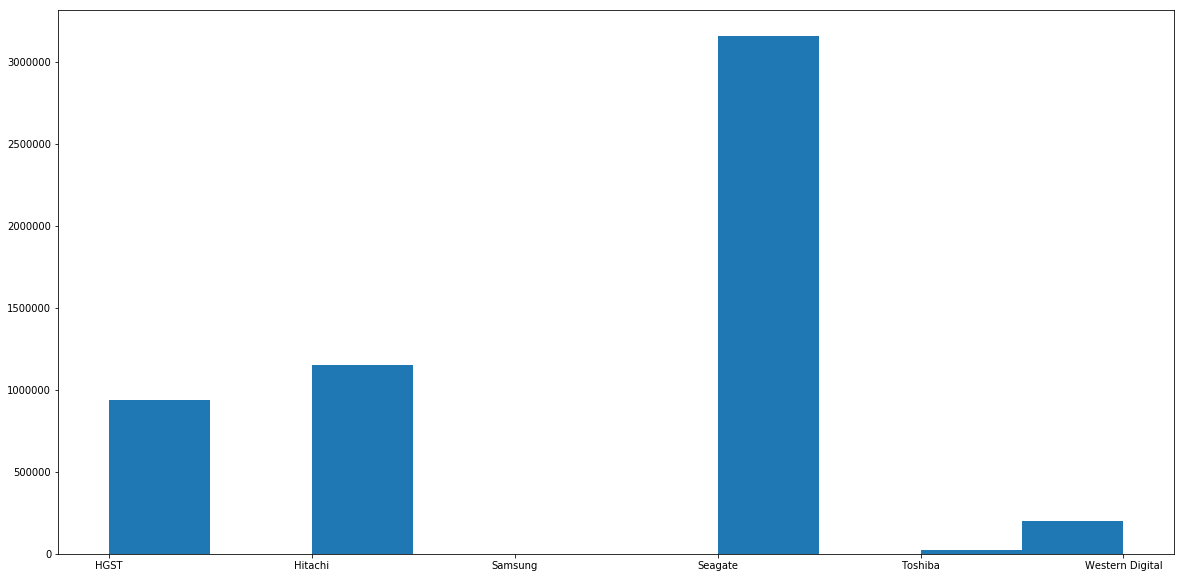

In [47]:
plt.figure(figsize=(20,10))
plt.hist(df_temp['Brands'])
plt.show()

In [48]:
df_temp.to_csv("./Hard Disk Drive - Data Mining - Data Folder/transformed_2016_Q1.csv")

In [16]:
failures = df_temp['failure'].sum()

In [17]:
total = df_temp['failure'].count()

In [18]:
daily_failure_rate = float(failures)/float(total)
daily_failure_rate

6.163257184492441e-05

In [21]:
quarter_failure_rate = daily_failure_rate*91*100
quarter_failure_rate

0.5608564037888122

In [6]:
brands = df_temp['Brands'].unique()
brands

array(['Hitachi', 'Seagate', 'Western Digital', 'HGST', 'Toshiba',
       'Samsung'], dtype=object)

In [11]:
for i in brands:
    print("Brand %s:" % i)
    fails = df_temp['failure'][df_temp['Brands'] == i].sum()
    print("FAILS: %s" % fails)
    total_each = df_temp['Brands'][df_temp['Brands'] == i].count()
    print("Total: %s" % total_each)
    failure_rate = (float(fails)/float(total_each))*100
    quarter_fail = failure_rate*91
    print("Daily Failure Rate: %s" % failure_rate)
    print("Quarterly failure rate: %s" % quarter_fail)
    print("\n")

Brand Hitachi:
FAILS: 37
Total: 1151007
Daily Failure Rate: 0.00321457645349
Quarterly failure rate: 0.292526457267


Brand Seagate:
FAILS: 245
Total: 3155389
Daily Failure Rate: 0.00776449433018
Quarterly failure rate: 0.706568984046


Brand Western Digital:
FAILS: 44
Total: 200458
Daily Failure Rate: 0.0219497351066
Quarterly failure rate: 1.9974258947


Brand HGST:
FAILS: 10
Total: 939403
Daily Failure Rate: 0.0010645058617
Quarterly failure rate: 0.0968700334148


Brand Toshiba:
FAILS: 1
Total: 21626
Daily Failure Rate: 0.00462406362712
Quarterly failure rate: 0.420789790068


Brand Samsung:
FAILS: 0
Total: 5
Daily Failure Rate: 0.0
Quarterly failure rate: 0.0




In [23]:
fail_model_wise = df_temp.groupby('model')['failure'].sum()
fail_model_wise

model
HGST                    10
Hitachi                 37
Samsung                  0
Seagate                245
TOSHIBA DT01ACA300       1
TOSHIBA MD04ABA400V      0
TOSHIBA MD04ABA500V      0
Western Digital         44
Name: failure, dtype: int64

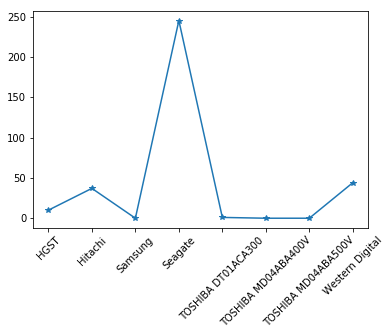

In [31]:
plt.plot(fail_model_wise, marker='*')
plt.xticks(rotation=45)
plt.show()